In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

scores_json = pd.read_json("/content/drive/MyDrive/content/data/average_scores.json")
temp = scores_json["eval_score_GPT"]
scores = temp.to_dict()
print(scores)

{'/content/drive/MyDrive/content/data/output/rag_chunk:100_embeddings:sentence-transformers~all-MiniLM-L6-v2_rerank:False_reader-model:zephyr-7b-beta.json': 0.725, '/content/drive/MyDrive/content/data/output/rag_chunk:100_embeddings:sentence-transformers~all-MiniLM-L6-v2_rerank:True_reader-model:zephyr-7b-beta.json': 0.725, '/content/drive/MyDrive/content/data/output/rag_chunk:100_embeddings:sentence-transformers~roberta-base-nli-stsb-mean-tokens_rerank:False_reader-model:zephyr-7b-beta.json': 0.55, '/content/drive/MyDrive/content/data/output/rag_chunk:100_embeddings:sentence-transformers~roberta-base-nli-stsb-mean-tokens_rerank:True_reader-model:zephyr-7b-beta.json': 0.6000000000000001, '/content/drive/MyDrive/content/data/output/rag_chunk:100_embeddings:thenlper~gte-small_rerank:False_reader-model:zephyr-7b-beta.json': 0.75, '/content/drive/MyDrive/content/data/output/rag_chunk:100_embeddings:thenlper~gte-small_rerank:True_reader-model:zephyr-7b-beta.json': 0.6000000000000001, '/cont

In [3]:

data = {
    'chunk_size': [],
    'embedding': [],
    'ranking': [],
    'score': []
}

for key in scores:
    temp = key.split("_")[1:4]
    data["chunk_size"].append(int(temp[0].split(":")[-1]))
    data["embedding"].append(temp[1].split(":")[-1])
    data["ranking"].append(temp[2].split(":")[-1])
    data["score"].append(scores[key])

# print(data)


df = pd.DataFrame(data)

# Calculate mean, median, and standard deviation for each parameter type
summary_stats = df.groupby('chunk_size')['score'].agg(['mean', 'median', 'std'])
print(summary_stats)
print()

summary_stats = df.groupby('embedding')['score'].agg(['mean', 'median', 'std'])
print(summary_stats)
print()

summary_stats = df.groupby('ranking')['score'].agg(['mean', 'median', 'std'])
print(summary_stats)
print()


                mean  median       std
chunk_size                            
100         0.658333  0.6625  0.084656
200         0.704167  0.7375  0.111149
300         0.691667  0.6750  0.140238
400         0.687500  0.7000  0.075416
500         0.629167  0.6375  0.057915

                                                      mean  median       std
embedding                                                                   
sentence-transformers~all-MiniLM-L6-v2              0.7125  0.7125  0.061520
sentence-transformers~roberta-base-nli-stsb-mea...  0.5825  0.5750  0.067752
thenlper~gte-small                                  0.7275  0.7250  0.082031

             mean  median       std
ranking                            
False    0.651667   0.700  0.103711
True     0.696667   0.675  0.083381



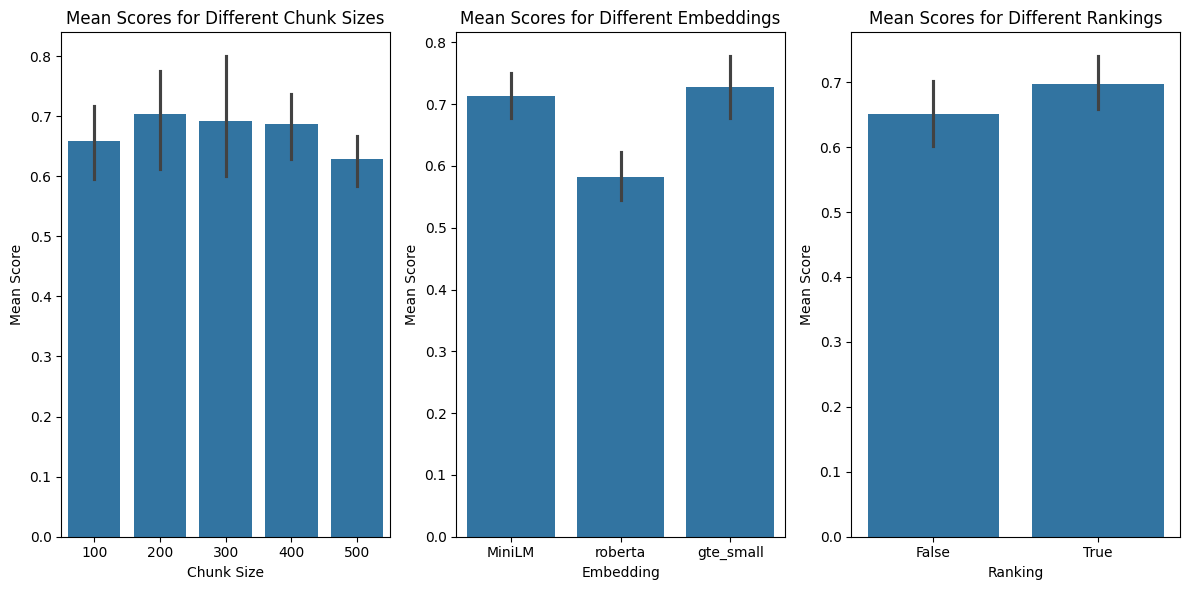

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['embedding'] = df['embedding'].replace({'sentence-transformers~all-MiniLM-L6-v2': 'MiniLM', 'sentence-transformers~roberta-base-nli-stsb-mean-tokens': 'roberta', 'thenlper~gte-small': 'gte_small'})
# Plot mean scores for different chunk sizes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='chunk_size', y='score', data=df, estimator=np.mean)
plt.title('Mean Scores for Different Chunk Sizes')
plt.xlabel('Chunk Size')
plt.ylabel('Mean Score')

# Plot mean scores for different embeddings
plt.subplot(1, 3, 2)
sns.barplot(x='embedding', y='score', data=df, estimator=np.mean)
plt.title('Mean Scores for Different Embeddings')
plt.xlabel('Embedding')
plt.ylabel('Mean Score')

# Plot mean scores for different rankings
plt.subplot(1, 3, 3)
sns.barplot(x='ranking', y='score', data=df, estimator=np.mean)
plt.title('Mean Scores for Different Rankings')
plt.xlabel('Ranking')
plt.ylabel('Mean Score')

plt.tight_layout()
plt.show()


In [21]:
from scipy.stats import f_oneway

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*[group['score'] for name, group in df.groupby('chunk_size')])
print("chunk_size")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The one-way ANOVA test indicates that there are statistically significant differences between the groups.")
else:
    print("The one-way ANOVA test does not indicate statistically significant differences between the groups.")
print()

f_statistic, p_value = f_oneway(*[group['score'] for name, group in df.groupby('embedding')])
print("embedding")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The one-way ANOVA test indicates that there are statistically significant differences between the groups.")
else:
    print("The one-way ANOVA test does not indicate statistically significant differences between the groups.")
print()

f_statistic, p_value = f_oneway(*[group['score'] for name, group in df.groupby('ranking')])
print("ranking")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The one-way ANOVA test indicates that there are statistically significant differences between the groups.")
else:
    print("The one-way ANOVA test does not indicate statistically significant differences between the groups.")


chunk_size
F-Statistic: 0.5691144708423327
P-Value: 0.6874142416496372
The one-way ANOVA test does not indicate statistically significant differences between the groups.

embedding
F-Statistic: 12.62896551724138
P-Value: 0.00013438659873415406
The one-way ANOVA test indicates that there are statistically significant differences between the groups.

ranking
F-Statistic: 1.71529411764706
P-Value: 0.20094475542339418
The one-way ANOVA test does not indicate statistically significant differences between the groups.


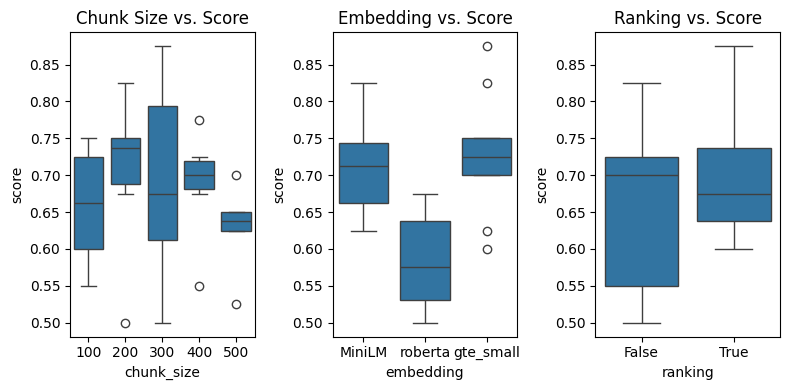

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df['embedding'] = df['embedding'].replace({'sentence-transformers~all-MiniLM-L6-v2': 'MiniLM', 'sentence-transformers~roberta-base-nli-stsb-mean-tokens': 'roberta'}, 'thenlper~gte-small':'gte_small')
df['embedding'] = df['embedding'].replace({'sentence-transformers~all-MiniLM-L6-v2': 'MiniLM', 'sentence-transformers~roberta-base-nli-stsb-mean-tokens': 'roberta', 'thenlper~gte-small': 'gte_small'})

# Create a box plot for each parameter type
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x='chunk_size', y='score', data=df)
plt.title('Chunk Size vs. Score')

plt.subplot(1, 3, 2)
sns.boxplot(x='embedding', y='score', data=df)
plt.title('Embedding vs. Score')

plt.subplot(1, 3, 3)
sns.boxplot(x='ranking', y='score', data=df)
plt.title('Ranking vs. Score')

plt.tight_layout()
plt.show()


In [ ]:


# Calculate total score for each combination
df['total_score'] = df.groupby(['chunk_size', 'embedding', 'ranking'])['score'].transform('sum')

# Drop duplicates to get unique combinations
unique_combinations = df[['chunk_size', 'embedding', 'ranking', 'total_score']].drop_duplicates()

# Sort combinations by total score in descending order and get top 10
top_10_combinations = unique_combinations.sort_values(by='total_score', ascending=False).head(10)

print("top 10 combinations")
print(top_10_combinations)
